## 横向堆叠（索引完全相同时）

In [11]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
conn=create_engine('mysql+pymysql://root:Cuiqin:233@localhost:3306/testdb?charset=utf8',encoding='utf-8',echo=True)
detail1=pd.read_sql('meal_order_detail1',conn)
df1=detail.iloc[:,:10]
df2=detail.iloc[:,10:]
print('合并后df1和df2的大小分别为：'+str(pd.concat([df1,df2],axis=1,join='inner').shape))
print('数据库大小：'+str(pd.concat([df1,df2],axis=1,join='outer').shape))

2020-03-26 09:01:05,040 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-03-26 09:01:05,042 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:01:05,051 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-03-26 09:01:05,052 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:01:05,060 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-03-26 09:01:05,060 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:01:05,067 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2020-03-26 09:01:05,068 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:01:05,080 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-03-26 09:01:05,082 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:01:05,087 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-03-26 09:01:05,088 INFO sqlalchemy.engine.base.E

In [12]:
df3 = detail.iloc[:1500,:]
df4 = detail.iloc[1500:,:]
print("df3",pd.concat([df3,df4],axis=1,join='outer').shape)
print(pd.concat([df3,df4],axis=1,join='inner').shape)

df3 (2779, 38)
(0, 38)


In [13]:
print('append方法:'+str(df3.shape+df4.shape))
print('总想堆叠后的数据框：'+str(df3.append(df4).shape))

append方法:(1500, 19, 1279, 19)
总想堆叠后的数据框：(2779, 19)


In [42]:
# merge合并
order = pd.read_csv('./data2/meal_order_info.csv',sep=',',encoding='gb18030')

In [52]:
import pandas as pd
order = pd.read_csv('./data2/meal_order_info.csv',sep=',',encoding='gb18030')
order['info_id'] = order['info_id'].astype('str')
order_detail1 = pd.merge(detail1,order,left_on='order_id',right_on='info_id')
print('detail订单那详情表的原始形状为：',detail1.shape)
print('order订单星系的原始形状',order.shape)
print('合并以后的形状',order_detail1.shape)

detail订单那详情表的原始形状为： (2779, 19)
order订单星系的原始形状 (945, 21)
合并以后的形状 (2779, 40)


In [65]:
order.rename({'info_id':'order_id'},inplace=True)
print(order.dtypes)
order_detail1['order_id']=order_detail1['order_id'].apply(int)
order_detail1=detail1.join(order,on='order_id',rsuffix='1')
print(order_detail1.shape)

info_id                 int64
emp_id                  int64
number_consumers        int64
mode                  float64
dining_table_id         int64
dining_table_name       int64
expenditure             int64
dishes_count            int64
accounts_payable        int64
use_start_time         object
check_closed          float64
lock_time              object
cashier_id            float64
pc_id                 float64
order_number          float64
org_id                  int64
print_doc_bill_num    float64
lock_table_info       float64
order_status            int64
phone                   int64
name                   object
dtype: object


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [20]:
# 重叠合并
dict1 = {'ID':[1,2,3,4,5,6,7,8,9],
        'System':['win10','win10',np.nan,'win10',np.nan,np.nan,'win7','win7','win8'],
        'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']}
dict2 = {'ID':[1,2,3,4,5,6,7,8,9],
        'System':[np.nan,np.nan,'win7',np.nan,'win8','win7',np.nan,np.nan,np.nan],
        'cpu':[np.nan,np.nan,'i3',np.nan,'i7','i5',np.nan,np.nan,np.nan]}
df5 = pd.DataFrame(dict1)
df6 = pd.DataFrame(dict2)
print(df5.combine_first(df6))

   ID System cpu
0   1  win10  i7
1   2  win10  i5
2   3   win7  i3
3   4  win10  i7
4   5   win8  i7
5   6   win7  i5
6   7   win7  i5
7   8   win7  i5
8   9   win8  i3


In [24]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

conn=create_engine('mysql+pymysql://root:Cuiqin:233@localhost:3306/testdb?charset=utf8',encoding='utf-8',echo=True)

In [25]:
detail1 = pd.read_sql('meal_order_detail1',conn)
detail2 = pd.read_sql('meal_order_detail2',conn)
detail3 = pd.read_sql('meal_order_detail3',conn)
detail = detail1.append(detail2)
detail = detail.append(detail3)
print(detail.shape)

2020-03-26 09:19:54,085 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-03-26 09:19:54,085 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:19:54,093 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-03-26 09:19:54,093 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:19:54,104 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-03-26 09:19:54,105 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:19:54,110 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2020-03-26 09:19:54,113 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:19:54,122 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-03-26 09:19:54,122 INFO sqlalchemy.engine.base.Engine {}
2020-03-26 09:19:54,126 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-03-26 09:19:54,129 INFO sqlalchemy.engine.base.E

In [40]:
order=pd.read_csv('./data2/meal_order_info.csv',sep=',',encoding='gb18030',engine='python')
user=pd.read_excel('./data2/users_info.xlsx')
order['emp_id'] = order['emp_id'].astype('str')
user['USER_ID'] = user['USER_ID'].astype('str')
order['info_id'] = order['info_id'].astype('str')
data = pd.merge(detail,order,left_on=['order_id','emp_id'],right_on=['info_id','emp_id'])
data = pd.merge(data,user,left_on='emp_id',right_on='USER_ID',how='inner')
print(data.shape)

(14713, 76)


In [15]:
import pandas as pd
detail1 = pd.read_csv('./data2/detail.csv',index_col=0,encoding='gbk')

# 定义去重函数方法
def delRep(list1):
    list2=[]
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2
dishes=list(detail1['dishes_name'])
print(len(dishes))
dish=delRep(dishes)
print(len(dish))

10037
145


In [16]:
# 方法二
print(len(dishes))
dish_set=set(dishes)
print(len(dish_set))

10037
145


In [17]:
# dishes_name
dishes_name = detail1['dishes_name'].drop_duplicates()
print('drop_duplicates方法去重之后菜品总数为',len(dishes_name))

drop_duplicates方法去重之后菜品总数为 145


In [18]:
print('去重之前订单详情表的形状为：',detail1.shape)
shapeDet = detail1.drop_duplicates(subset=['order_id',
                                         'emp_id']).shape
print(shapeDet)

去重之前订单详情表的形状为： (10037, 18)
(942, 18)


In [19]:
corrDet = detail1[['counts','amounts']].corr(method='kendall')
print(corrDet)

           counts   amounts
counts   1.000000 -0.229968
amounts -0.229968  1.000000


In [20]:
corrDet1=detail1[['dishes_name','counts','amounts']].corr(method='pearson')
print(corrDet1)

           counts   amounts
counts   1.000000 -0.159264
amounts -0.159264  1.000000


In [21]:
# 求取特征是否完全相同的矩阵的函数
def FeatureEquals(df):
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
        for j in df.columns:
            dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
detEquals=FeatureEquals(detail1)
print(detEquals.iloc[:5,:5])

                   order_id  dishes_id  logicprn_name  parent_class_name  \
order_id               True      False          False              False   
dishes_id             False       True          False              False   
logicprn_name         False      False           True               True   
parent_class_name     False      False           True               True   
dishes_name           False      False          False              False   

                   dishes_name  
order_id                 False  
dishes_id                False  
logicprn_name            False  
parent_class_name        False  
dishes_name               True  


In [22]:
# 遍历所有数据
lenDet=detEquals.shape[0]
dupCol=[]
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & \
        (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
print('需要删除的列：',dupCol)
detail1.drop(dupCol,axis=1,inplace=True)
print('删除多余列后detail的特征数目为',detail1.shape[1])

需要删除的列： ['parent_class_name', 'cost', 'discount_amt', 'discount_reason', 'kick_back', 'add_info', 'bar_code', 'add_inprice']
删除多余列后detail的特征数目为 10


In [23]:
print('detial每个特征缺失的数目为:\n',detail1.isnull().sum())

detial每个特征缺失的数目为:
 order_id                0
dishes_id               0
logicprn_name       10037
dishes_name             0
itemis_add              0
counts                  0
amounts                 0
place_order_time        0
picture_file            0
emp_id                  0
dtype: int64


In [24]:
print('detail每个特征非缺失的数目为:\n',detail1.notnull().sum())

detail每个特征非缺失的数目为:
 order_id            10037
dishes_id           10037
logicprn_name           0
dishes_name         10037
itemis_add          10037
counts              10037
amounts             10037
place_order_time    10037
picture_file        10037
emp_id              10037
dtype: int64


# 删除法

In [27]:
print('去除缺失的列前detial.shape=',detail1.shape)

去除缺失的列前detial.shap= (10037, 10)


In [28]:
print('after, detail.shape=',
     detail1.dropna(axis=1,how='any').shape)

after, detail.shape= (10037, 9)


# 替换法

In [29]:
detail1 = detail1.fillna(-99)
print("detail每个特征的缺失数目为:\n",
     detail1.isnull().sum())

detail每个特征的缺失数目为:
 order_id            0
dishes_id           0
logicprn_name       0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


# 插值法

In [32]:
import numpy as np
from scipy.interpolate import interp1d # 1
x=np.array([1,2,3,4,5,8,9,10])
y1=np.array([2,8,18,32,50,128,162,200])
y2=np.array([3,5,7,9,11,17,19,21])
LinearInsValue1=interp1d(x,y1,kind='linear')
LinearInsValue2=interp1d(x,y2,kind='linear')
print('x=6、7,y1=',LinearInsValue1([6,7]))
print('x=6、7,y2=',LinearInsValue2([6,7]))

x=6、7,y1= [ 76. 102.]
x=6、7,y2= [13. 15.]


In [33]:
# 拉格朗日
from scipy.interpolate import lagrange
LargeInsValue1=lagrange(x,y1)
LargeInsValue2=lagrange(x,y2)
print(LargeInsValue1([6,7]))
print(LargeInsValue2([6,7]))

[72. 98.]
[13. 15.]


In [40]:
# 样条插值 2
from scipy.interpolate import make_interp_spline
xnew=np.array([6,7])
SplineInsValue1=make_interp_spline(x,y1)(xnew)
SplineInsValue2=make_interp_spline(x,y2)(xnew)
print(SplineInsValue1)
print(SplineInsValue2) 

[72. 98.]
[13. 15.]


In [43]:
# 识别异常值函数
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std()>Ser1) | \
    (Ser1.mean()+3*Ser1.var()<Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]
    outrange=Ser1.iloc[index]
    return outrange
outlier = outRange(detail1['counts'])
print("异常值个数为",outlier.shape[0])
print("异常值最大值：",outlier.max())
print('异常值最小值：',outlier.min())

异常值个数为 209
异常值最大值： 10
异常值最小值： 3


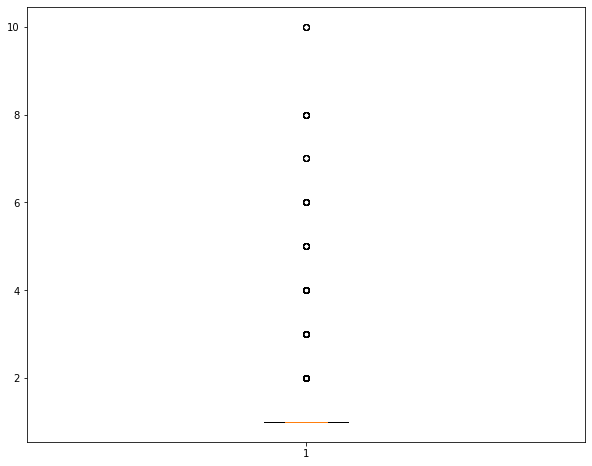

516
10
2


In [45]:
# 根据箱线图识别异常值
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
p = plt.boxplot(detail1['counts'].values,notch=True)
outlier1=p['fliers'][0].get_ydata()
plt.savefig('./异常值识别')
plt.show()
print(len(outlier1))
print(max(outlier1))
print(min(outlier1))

In [46]:
# 去重
import pandas as pd
detail = pd.read_csv('./data2/detail.csv',index_col=0,encoding='gbk')
print('去重操作前订单详情表：',detail.shape)
#
detail.drop_duplicates(inplace=True)
def FeatureEquals(df):
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
        for j in df.columns:
            dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
detEquals=FeatureEquals(detail)
lenDet=detEquals.shape[0]
dupCol=[]
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & \
        (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
detail.drop(dupCol,axis=1,inplace=True)
print("去重后：",detail.shape)

去重操作前订单详情表： (10037, 18)
(10037, 10)


In [47]:
# 统计各个特征的缺失率
naRate=(detail.isnull().sum()/\
       detail.shape[0]*100).astype('str')+'%'
print('每个特征的缺失率为：',naRate)
# 删除全部数据均为缺失的列
detail.dropna(axis=1,how="all",inplace=True)
print('处理以后的哥哥特征值确实数目：',detail.isnull().sum())

每个特征的缺失率为： order_id              0.0%
dishes_id             0.0%
logicprn_name       100.0%
dishes_name           0.0%
itemis_add            0.0%
counts                0.0%
amounts               0.0%
place_order_time      0.0%
picture_file          0.0%
emp_id                0.0%
dtype: object
处理以后的哥哥特征值确实数目： order_id            0
dishes_id           0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


In [50]:
# 定义异常值识别与处理函数
def outRange(Ser1):
    QL=Ser1.quantile(0.25)
    QU=Ser1.quantile(0.75)
    IQR=QU-QL
    Ser1.loc[Ser1>(QU+1.5*IQR)]=QU
    Ser1.loc[Ser1<(QU-1.5*IQR)]=QL
    return Ser1
detail['counts']==outRange(detail['counts'])
detail['amounts']=outRange(detail['amounts'])
#查看
print('max=',detail['counts'].max())
print('min=',detail['counts'].min())
print('售价min=',detail['amounts'].min())
print('售价max=',detail['amounts'].max())

max= 1.0
min= 1.0
售价min= 10.0
售价max= 99.0


In [53]:
# 离差标准化
import pandas as pd
import numpy as np
detail=pd.read_csv('./data2/detail.csv',index_col=0,
                  encoding='gbk')
def MinMaxScale(data):
    data=(data-data.min())/(data.max()-data.min())
    return data
# 对售价和销售离差标准化
data1=MinMaxScale(detail['counts'])
data2=MinMaxScale(detail['amounts'])
data3=pd.concat([data1,data2],axis=1)
print('之前',detail[['counts','amounts']].head())
print('之后',data3.head())

之前            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
之后            counts   amounts
detail_id                  
2956          0.0  0.271186
2958          0.0  0.265537
2961          0.0  0.163842
2966          0.0  0.135593
2968          0.0  0.067797


In [54]:
# 自定义标准差标准化函数
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data
data4=StandardScaler(detail['counts'])
data5=StandardScaler(detail['amounts'])
data6=pd.concat([data4,data5],axis=1)
print('标准化之前',detail[['counts','amounts']].head())
print("标准化之后",data6.head())

标准化之前            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
标准化之后              counts   amounts
detail_id                    
2956      -0.177571  0.116671
2958      -0.177571  0.088751
2961      -0.177571 -0.413826
2966      -0.177571 -0.553431
2968      -0.177571 -0.888482


In [55]:
# 小鼠定标准华函数

In [58]:
def DecimalScaler(data):
    data=data/10**np.ceil(np.log10(data.abs().max()))
    return data
data7=DecimalScaler(detail['counts'])
data8=DecimalScaler(detail['amounts'])
data9=pd.concat([data7,data8],axis=1)
print('之前',detail[['counts','amounts']].head())
print('之后',data9.head())

之前            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
之后            counts  amounts
detail_id                 
2956          0.1    0.049
2958          0.1    0.048
2961          0.1    0.030
2966          0.1    0.025
2968          0.1    0.013


In [60]:
# 自定义标准差标准化函数
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data
data4=StandardScaler(detail['counts'])
data5=StandardScaler(detail['amounts'])
data6=pd.concat([data4,data5],axis=1)
print('before:',detail[['counts','amounts']].head())
print('after:',data6.head())

before:            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
after:              counts   amounts
detail_id                    
2956      -0.177571  0.116671
2958      -0.177571  0.088751
2961      -0.177571 -0.413826
2966      -0.177571 -0.553431
2968      -0.177571 -0.888482


# 转换数据

In [61]:
# 哑变量处理
import pandas as pd
import numpy as np
detail=pd.read_csv('./data2/detail.csv',encoding='gbk')
data=detail.loc[0:5,'dishes_name']
print('哑变量处理前数据：',data)
print('哑变量处理后数据：',pd.get_dummies(data))

哑变量处理前数据： 0     蒜蓉生蚝
1    蒙古烤羊腿
2     大蒜苋菜
3    芝麻烤紫菜
4      蒜香包
5      白斩鸡
Name: dishes_name, dtype: object
哑变量处理后数据：    大蒜苋菜  白斩鸡  芝麻烤紫菜  蒙古烤羊腿  蒜蓉生蚝  蒜香包
0     0    0      0      0     1    0
1     0    0      0      1     0    0
2     1    0      0      0     0    0
3     0    0      1      0     0    0
4     0    0      0      0     0    1
5     0    1      0      0     0    0


In [64]:
# 等宽离散
price=pd.cut(detail['amounts'],5)
print('离散后5条记录售价\n',price.value_counts())

离散后5条记录售价
 (0.823, 36.4]     5461
(36.4, 71.8]      3157
(71.8, 107.2]      839
(142.6, 178.0]     426
(107.2, 142.6]     154
Name: amounts, dtype: int64


In [67]:
# 等频法
def SameRateCut(data,k):
    w=data.quantile(np.arange(0,1+1.0/k,1.0/k))
    data=pd.cut(data,w)
    return data
result=SameRateCut(detail['amounts'],5).value_counts()
print('离散化后的类别分布状况','\n',result)

离散化后的类别分布状况 
 (18.0, 32.0]     2107
(39.0, 58.0]     2080
(32.0, 39.0]     1910
(1.0, 18.0]      1891
(58.0, 178.0]    1863
Name: amounts, dtype: int64


In [75]:
# 聚类分析离散化 3
def KmeanCut(data,k):
    from sklearn.cluster import KMeans
    kmodel=KMeans(n_clusters=k,n_jobs=4)
    kmodel.fit(data.values.reshape((len(data),1)))
    
    c=pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
    w=c.rolling(2).mean().iloc[1:]
    w=[0]+list(w[0])+[data.max()]
    data=pd.cut(data,w)
    return data
result=KmeanCut(detail['amounts'],5).value_counts()
print('聚类离散化以后的类别分布','\n',result)

聚类离散化以后的类别分布 
 (22.31, 43.51]       3690
(43.51, 73.945]      2474
(0.0, 22.31]         2454
(73.945, 131.858]     993
(131.858, 178.0]      426
Name: amounts, dtype: int64
